In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read original image
img = cv2.imread('image1.jpg')

In [5]:
print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))
print("- Image Data Type: " + str(img.dtype))

Image Properties
- Number of Pixels: 151200
- Shape/Dimensions: (168, 300, 3)
- Image Data Type: uint8


Original Image:


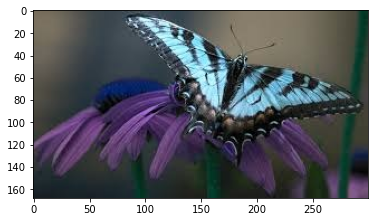

In [6]:
# Show original image without convert BRG channel to RGB
print('Original Image:')
plt.imshow(img)

Original Image:


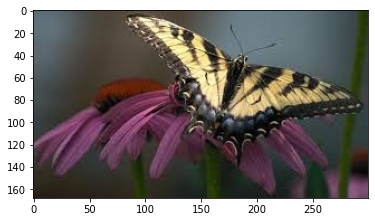

In [7]:
# Show original image with convert BRG channel to RGB
print('Original Image:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
img = cv2.imread('image1.jpg', 1)
cv2.imshow('my image show', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

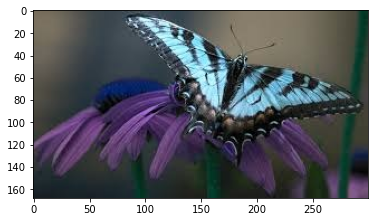

In [9]:
plt.imshow(img)

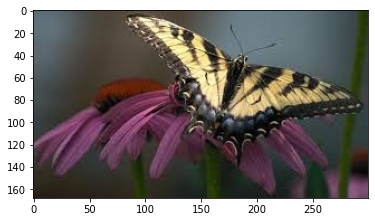

In [10]:
# We can split the our image into 3 three channels 
blue, green, red = cv2.split(img)
# Next, we merge the channels in order to build a new image
img1 = cv2.merge([red, green, blue])
plt.imshow(img1)

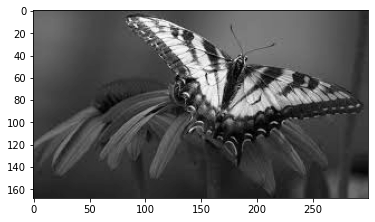

In [11]:
img2 = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')

# sampling and quantization

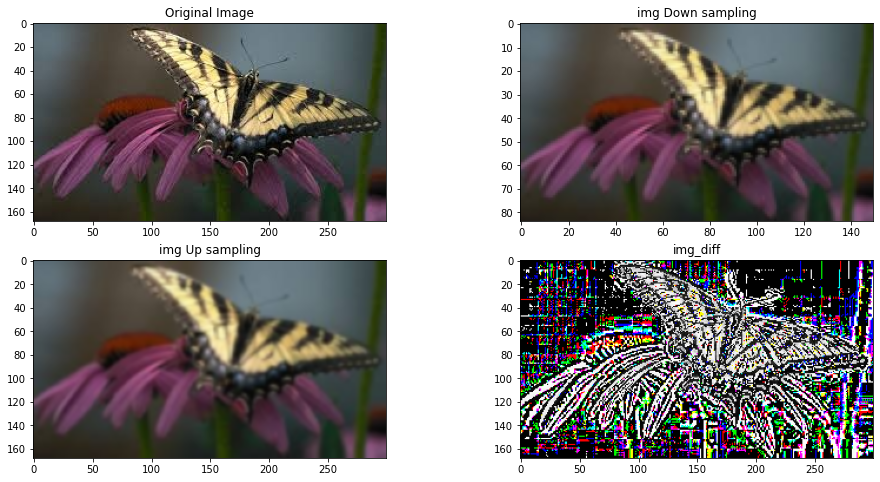

In [14]:
# 1. Import pictures
img_src = cv2.imread("image1.jpg")

# 2. Perform down sampling Up sampling
img_down = cv2.pyrDown(img_src)
img_up = cv2.pyrUp(img_down)

# 3. The difference between the original picture and the sample
img_diff = img_up - img_src

# 4. Display the result
# Display original and transformed images
plt.figure(figsize=(16, 8))
# Plot the original image against the edges
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(img_down, cv2.COLOR_BGR2RGB))
plt.title('img Down sampling')
plt.subplot(2, 2, 3), plt.imshow(cv2.cvtColor(img_up, cv2.COLOR_BGR2RGB))
plt.title('img Up sampling')
plt.subplot(2, 2, 4), plt.imshow(cv2.cvtColor(img_diff, cv2.COLOR_BGR2RGB))
plt.title('img_diff')

# Display the two images
plt.show()

In [15]:
img_diff

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255, 255],
        [254,   0,   0],
        [255,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0, 255, 255],
        [254,   0,   0],
        [255,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [254, 255, 255],
        [254,   0,   0],
        [254,   1,   1]],

       ...,

       [[  0,   0,   1],
        [  0,   0,   1],
        [  0,   0,   1],
        ...,
        [  1,   2,   1],
        [  0,   1,   0],
        [  0,   1,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  1,   1,   2],
        [  3,   1,   2],
        [  2,   0,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  2,   2,   2],
        [  3,   2,   2],
        [  2,   1,   1]]

In [16]:
#Image sampling using mean method
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("image1.jpg")
print(image.shape)
print(image.dtype)

(168, 300, 3)
uint8


42 75 3
(168, 300, 3)
uint8


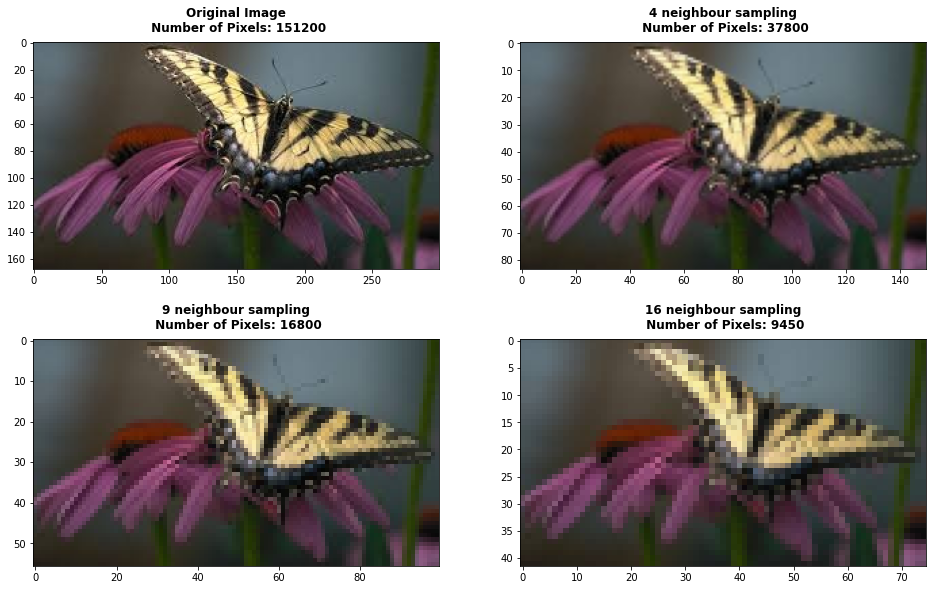

In [19]:
ratio = 2 # with 2 * 2 square
image2=np.zeros((int(image.shape[0]/ratio),
                 int(image.shape[1]/ratio),
                     image.shape[2]),dtype='float64')

for i in range(image2.shape[0]):
    for j in range(image2.shape[1]):
        for k in range(image2.shape[2]):
            delta=image[i*ratio:(i+1)*ratio,j*ratio:(j+1)*ratio,k]
            image2[i,j,k]=np.mean(delta)

ratio = 3   # with 3 * 3 square
image3=np.zeros((int(image.shape[0]/ratio),
                 int(image.shape[1]/ratio),
                     image.shape[2]),dtype='float64')

for i in range(image3.shape[0]):
    for j in range(image3.shape[1]):
        for k in range(image3.shape[2]):
            delta=image[i*ratio:(i+1)*ratio,j*ratio:(j+1)*ratio,k]
            image3[i,j,k]=np.mean(delta)            
            
ratio = 4   # with 4 * 4 square
image4=np.zeros((int(image.shape[0]/ratio),
                 int(image.shape[1]/ratio),
                     image.shape[2]),dtype='float64')

for i in range(image4.shape[0]):
    for j in range(image4.shape[1]):
        for k in range(image4.shape[2]):
            delta=image[i*ratio:(i+1)*ratio,j*ratio:(j+1)*ratio,k]
            image4[i,j,k]=np.mean(delta)  
            

print(int(image.shape[0]/ratio),int(image.shape[1]/ratio),image.shape[2])
print(image.shape)
print(image.dtype)

image2 = image2.astype(np.uint8)
image3 = image3.astype(np.uint8)
image4 = image4.astype(np.uint8)

# 4. Display the result
# Display original and transformed images
plt.figure(figsize=(16, 10))
# Plot the original image against the edges
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image\n Number of Pixels: ' + str(image.size), fontsize='large', fontweight='bold', pad=10)

plt.subplot(2, 2, 2), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('4 neighbour sampling\n Number of Pixels: ' + str(image2.size), fontsize='large', fontweight='bold', pad=10)

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('9 neighbour sampling\n Number of Pixels: ' + str(image3.size), fontsize='large', fontweight='bold', pad=10)

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.title('16 neighbour sampling\n Number of Pixels: ' + str(image4.size), fontsize='large', fontweight='bold', pad=10)

# Display the two images
plt.show()

(168, 300, 3)
<class 'numpy.ndarray'>


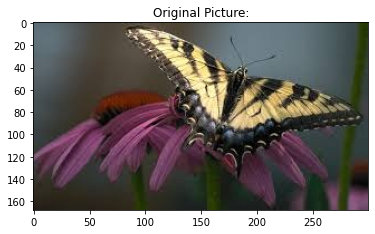

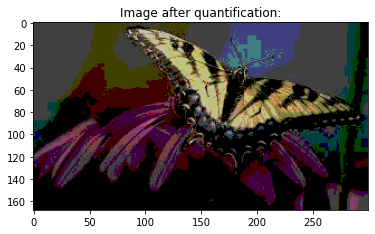

In [21]:
image = cv2.imread("image1.jpg")
print(image.shape)
print(type(image))

plt.title("Original Picture:")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

ratio=64  # Set quantization ratio
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            image[i][j][k]=int(image[i][j][k]/ratio)*ratio
            
plt.title("Image after quantification:")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()



# Adding bias 128

(168, 300, 3)
uint8


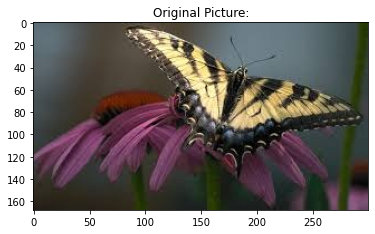

In [22]:
image = cv2.imread("image1.jpg")
print(image.shape)
print(image.dtype)

plt.title("Original Picture:")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
info = np.iinfo(image.dtype)
info

iinfo(min=0, max=255, dtype=uint8)

In [24]:
data = image.astype(np.float64) / info.max # normalize the data to 0 - 1
data = data  + 128
data = 255 * data # Now scale by 255
img = data.astype(np.uint8)

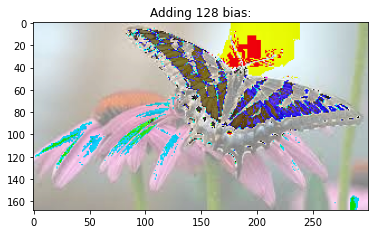

In [25]:
plt.title("Adding 128 bias:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

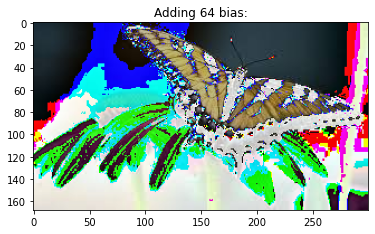

In [26]:
data = image.astype(np.float64) / info.max # normalize the data to 0 - 1
data = data  + 64
data = 255 * data # Now scale by 255
img = data.astype(np.uint8)
plt.title("Adding 64 bias:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

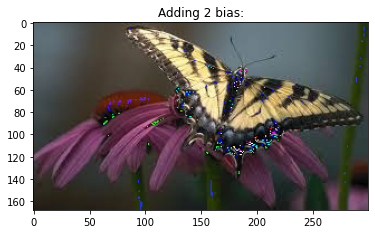

In [27]:
data = image.astype(np.float64) / info.max # normalize the data to 0 - 1
data = data  + 2
data = 255 * data # Now scale by 255
img = data.astype(np.uint8)
plt.title("Adding 2 bias:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Apply some filter

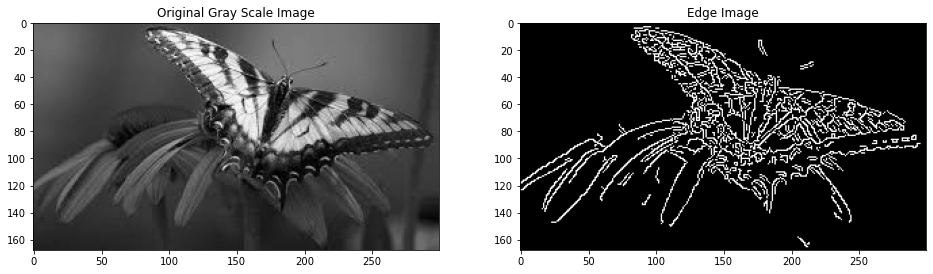

In [28]:
# Declaring the output graph's size
plt.figure(figsize=(16, 16))

# Convert image to grayscale
img_gs = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.jpg', img_gs)

# Apply canny edge detector algorithm on the image to find edges
edges = cv2.Canny(img_gs, 100,200)

# Plot the original image against the edges
plt.subplot(121), plt.imshow(img_gs, cmap='gray')
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image')

# Display the two images
plt.show()

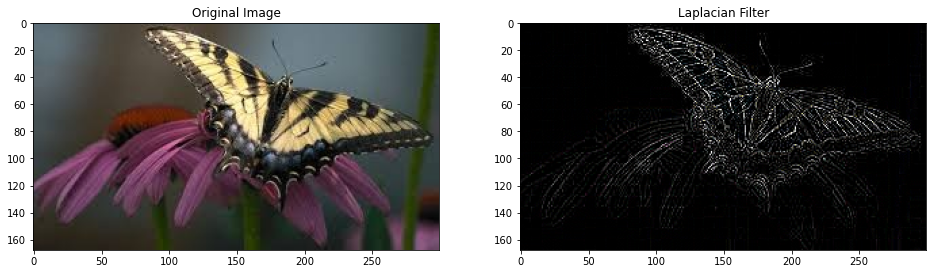

In [30]:
# Original input
src = 'image1.jpg'
input_image = cv2.imread(src)

# Applying Laplacian transformation:
laplacian = cv2.Laplacian(input_image, cv2.CV_8UC3)

# Display original and transformed images
plt.figure(figsize=(16, 8))
# Plot the original image against the edges
plt.subplot(121), plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
plt.title('Laplacian Filter')

# Display the two images
plt.show()

# Scailing

Original Dimensions :  (225, 225, 3)


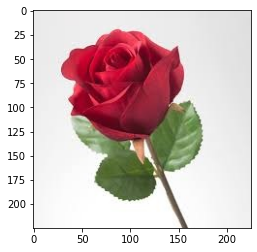

In [31]:
img = cv2.imread('image2.jpg')
print('Original Dimensions : ',img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

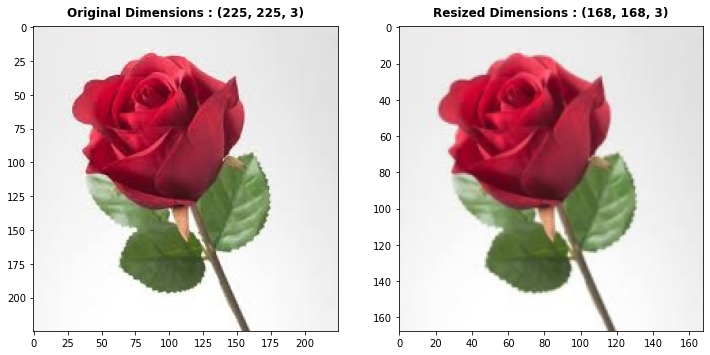

In [33]:
scale_percent = 75 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
# Display the result
plt.figure(figsize=(12, 8))
# Plot the original image against the edges
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Dimensions : ' + str(img.shape) , fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.title('Resized Dimensions : ' + str(resized.shape) , fontsize='large', fontweight='bold', pad=10)
plt.show()

# Translation

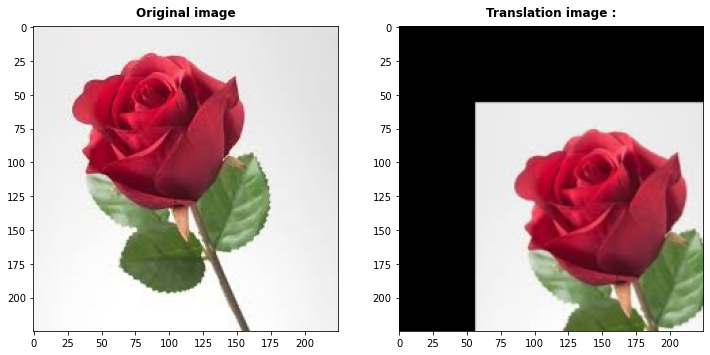

In [34]:
# Store height and width of the image
height, width = img.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(img, T, (width, height))

# Display the result
plt.figure(figsize=(12, 8))
# Plot the original image against the edges
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image', fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
plt.title('Translation image :' , fontsize='large', fontweight='bold', pad=10)
plt.show()

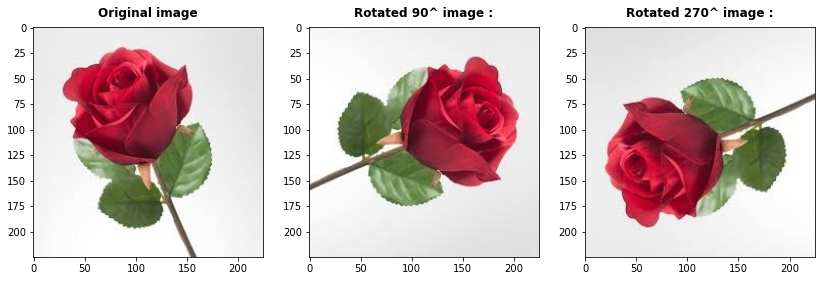

In [35]:
# Using cv2.rotate() method
# Using cv2.ROTATE_90_CLOCKWISE rotate
# by 90 degrees clockwise
image = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)

# Using cv2.ROTATE_90_COUNTERCLOCKWISE 
# rotate by 270 degrees clockwise
image2 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display the result
plt.figure(figsize=(14, 10))
# Plot the original image against the edges
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original image', fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Rotated 90^ image :' , fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Rotated 270^ image :' , fontsize='large', fontweight='bold', pad=10)
plt.show()

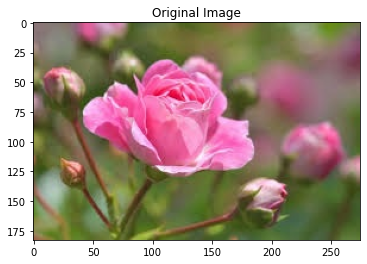

In [36]:
# Original Color image
input_image = cv2.imread('image3.jpg')

# Plot the original image 
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

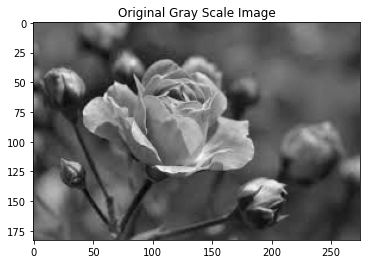

In [37]:
# Grayscale image
input_gray_image = cv2.imread('image3.jpg', cv2.IMREAD_GRAYSCALE)


# Display grayscale version
plt.imshow(input_gray_image, cmap='gray')
plt.title('Original Gray Scale Image')
plt.show()

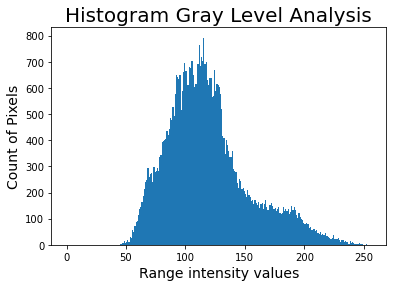

In [38]:
plt.hist(input_gray_image.ravel(),256,[0,256])
plt.title('Histogram Gray Level Analysis',fontsize=20)
plt.xlabel('Range intensity values',fontsize=14)
plt.ylabel('Count of Pixels',fontsize=14)
plt.show()

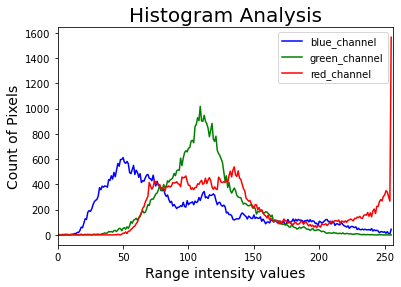

In [39]:
# setting RGB color list:
color = ('blue', 'green', 'red')
input_image = cv2.imread('image3.jpg')
# Iterating throuhg each channel and plotting the corresponding result:
# using cv.calcHist() opencv method
for i,color in enumerate(color):
    histogram = cv2.calcHist([input_image], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    plt.plot(histogram, color=color, label=color+'_channel')
    # plt.plot(cdf_percent, color=color, label=color+'_cdf')
    plt.xlim([0,256])

plt.title('Histogram Analysis',fontsize=20)
plt.xlabel('Range intensity values',fontsize=14)
plt.ylabel('Count of Pixels',fontsize=14)
plt.legend()
plt.show()

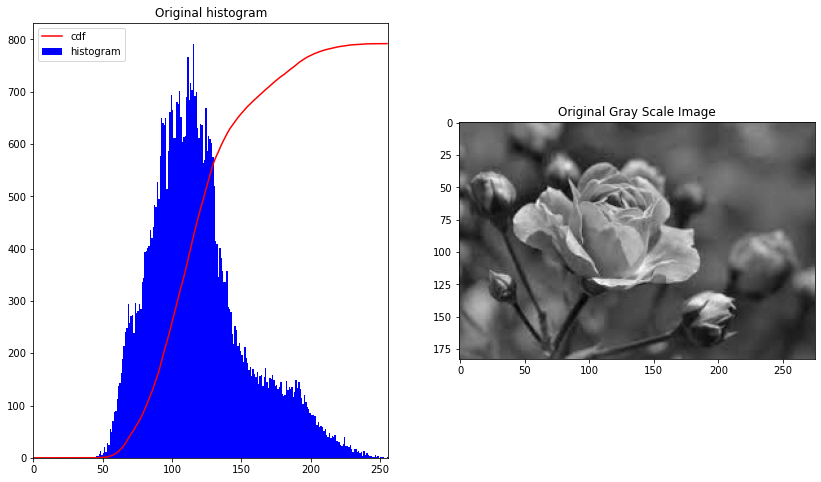

In [40]:
img = cv2.imread('image3.jpg',0)

hist1,bins1 = np.histogram(input_gray_image.flatten(),256,[0,256])

cdf = hist1.cumsum()
cdf_normalized = cdf * hist1.max()/ cdf.max()

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Original histogram')


plt.subplot(1, 2, 2)
plt.imshow(input_gray_image, cmap='gray')
plt.title('Original Gray Scale Image')
plt.show()

In [41]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [42]:
img2 = cdf[input_gray_image]

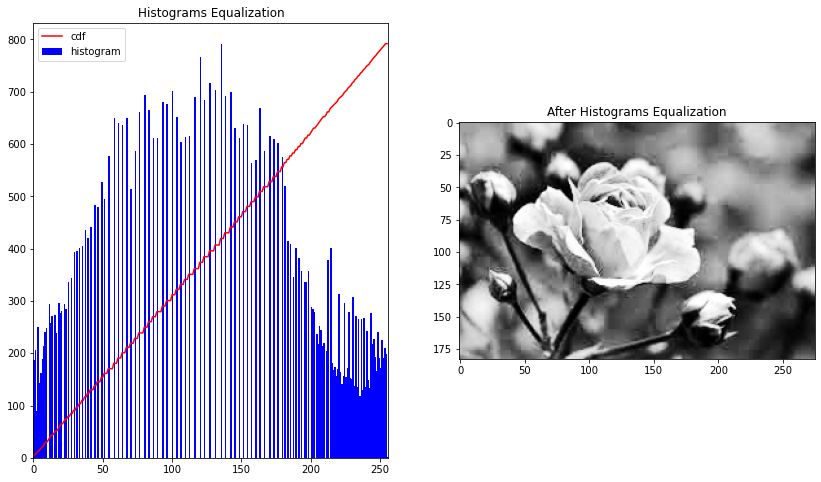

In [43]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(cdf_normalized, color = 'r')
plt.hist(img2.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histograms Equalization')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('After Histograms Equalization')
plt.show()

In [44]:
cdf_normalized, cdf_normalized.shape, hist1,bins1 

(array([  2.94295082,   6.18491803,   7.60131148,  11.5357377 ,
         13.78622951,  16.3357377 ,  19.29442623,  22.64655738,
         26.43934426,  30.35803279,  30.35803279,  34.98491803,
         39.0452459 ,  43.31016393,  43.31016393,  47.62229508,
         51.38360656,  51.38360656,  56.04196721,  60.40131148,
         64.82360656,  64.82360656,  69.46622951,  73.9357377 ,
         73.9357377 ,  79.23934426,  79.23934426,  84.63737705,
         84.63737705,  90.82229508,  90.82229508,  97.05442623,
         97.05442623, 103.3652459 , 103.3652459 , 109.73901639,
        109.73901639, 116.58491803, 116.58491803, 123.2104918 ,
        123.2104918 , 130.15081967, 130.15081967, 130.15081967,
        137.76786885, 137.76786885, 145.30622951, 145.30622951,
        145.30622951, 153.6       , 153.6       , 161.37442623,
        161.37442623, 161.37442623, 170.45508197, 170.45508197,
        170.45508197, 170.45508197, 180.68459016, 180.68459016,
        180.68459016, 190.77245902, 190.

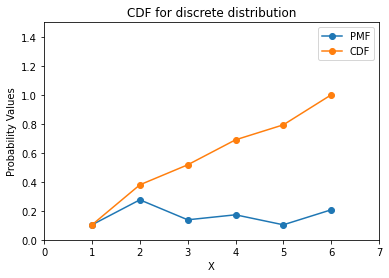

In [45]:
import numpy as np
import matplotlib.pyplot as plt 

x=np.arange(1,7)
frequency=np.array([3,8,4,5,3,6])
pdf=frequency/np.sum(frequency)
cdf=np.cumsum(pdf)

plt.plot(x,pdf, marker="o",label="PMF")
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlim(0,7)
plt.ylim(0,1.5)
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for discrete distribution")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Fit results: mu = 0.00,  std = 1.00')

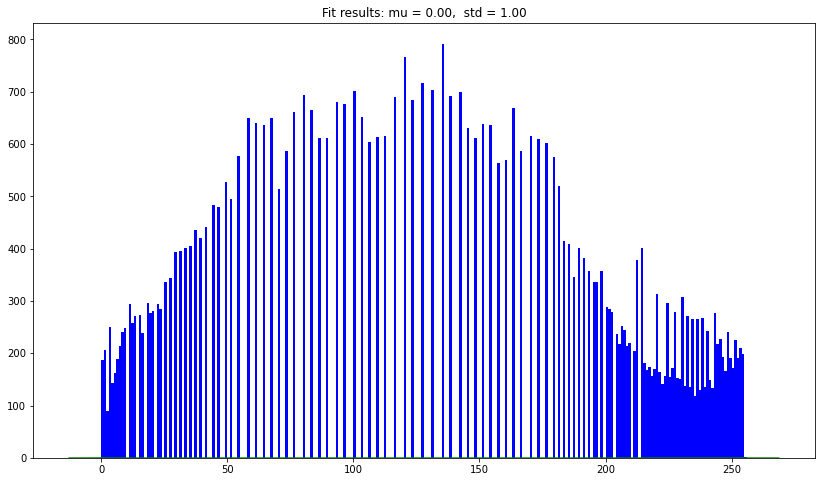

In [60]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import curve_fit

# Fit a normal distribution to the data:
mu, std = 0, 1
# Plot the histogram.
plt.figure(figsize=(14, 8))

plt.hist(img2.flatten(),256,[0,256], color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 300)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'g', linewidth=1)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)



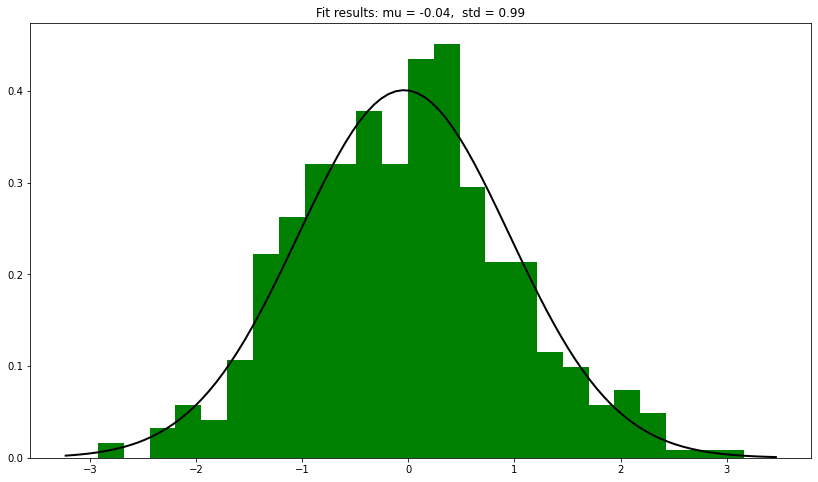

In [47]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(0.0, 1.0, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

plt.figure(figsize=(14, 8))

# Plot the histogram.
plt.hist(data, bins=25, density=True, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [48]:
hist.shape, bins.shape

((256,), (257,))

In [49]:
def find_nearest_above(my_array, target):
    diff = my_array - target
    mask = np.ma.less_equal(diff, -1)
    # We need to mask the negative differences
    # since we are looking for values above
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c # returns min index of the nearest if target is greater than any value
    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()

In [50]:
def hist_match(original, specified):

    oldshape = original.shape
    original = original.ravel()
    specified = specified.ravel()

    # get the set of unique pixel values and their corresponding indices and counts
    s_values, bin_idx, s_counts = np.unique(original, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(specified, return_counts=True)

    # Calculate s_k for original image
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    
    # Calculate s_k for specified image
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # Round the values
    sour = np.around(s_quantiles*255)
    temp = np.around(t_quantiles*255)
    
    # Map the rounded values
    b=[]
    for data in sour[:]:
        b.append(find_nearest_above(temp,data))
    b= np.array(b,dtype='uint8')

    return b[bin_idx].reshape(oldshape)

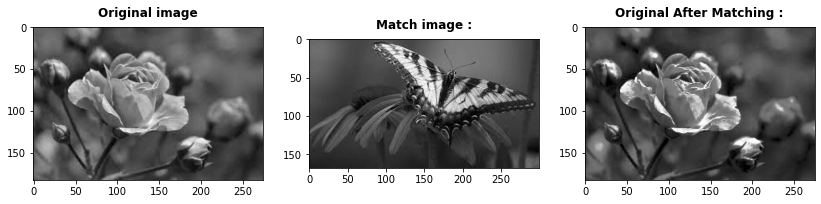

In [64]:
import cv2
import numpy as np

# Load the images in greyscale
original = cv2.imread('image3.jpg',0)
specified = cv2.imread('image1.jpg',0)

# perform Histogram Matching
a = hist_match(original, specified)

# Display the image

plt.figure(figsize=(14, 10))
# Plot the original image against the edges
plt.subplot(1, 3, 1), plt.imshow(original, cmap='gray')
plt.title('Original image', fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 3, 2), plt.imshow(specified, cmap='gray')
plt.title('Match image :' , fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 3, 3), plt.imshow(np.array(a,dtype='uint8'), cmap='gray')
plt.title('Original After Matching :' , fontsize='large', fontweight='bold', pad=10)
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

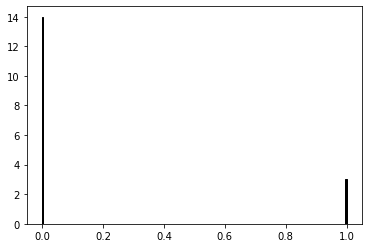

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.optimize import curve_fit

# Read image
img=mpimg.imread('image3.jpg')

# Get histogram
hist,bins,_ = plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

# Get centers of histogram bins
bin_centers = np.mean([bins[:-1],bins[1:]], axis=0)

# Define the Gaussian function
def gaussian(x, mu, sigma, amp):
    return amp*np.exp( -(x - mu)**2 / (2.*sigma**2))

# Curve fit
p_opt,_ = curve_fit(gaussian, bin_centers, hist)

# Get the fit parameters
mu, sigma, amp = p_opt

fit = gaussian(bin_centers, 0, 1)
plt.plot(bin_centers, hist)
plt.plot(bin_centers, fit)

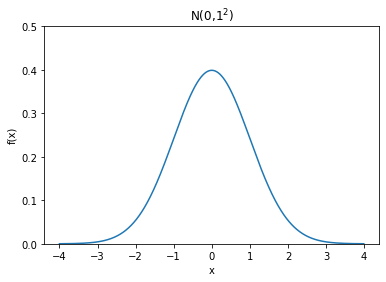

In [58]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.01)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)

plt.show()

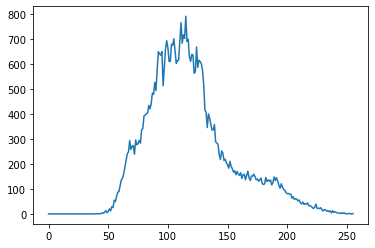

In [331]:
# find frequency of pixels in range 0-255
histr = cv2.calcHist([input_gray_image],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [2]:
dst = cv2.equalizeHist(input_gray_image)
plt.figure(figsize=(14, 10))
# Plot the original image against the edges
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(input_gray_image, cv2.COLOR_BGR2GRAY))
plt.title('Original image', fontsize='large', fontweight='bold', pad=10)

plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY))
plt.title('Original image', fontsize='large', fontweight='bold', pad=10)
plt.show()

NameError: name 'cv2' is not defined

In [ ]:
ratio = 4   #Here you can change the resolution of the image
image4=np.zeros((int(image.shape[0]/ratio),
                 int(image.shape[1]/ratio),
                     image.shape[2]),dtype='float64')

for i in range(image4.shape[0]):
    for j in range(image4.shape[1]):
        for k in range(image4.shape[2]):
            delta=image[i*ratio:(i+1)*ratio,j*ratio:(j+1)*ratio,k]
            image1[i,j,k]=np.mean(delta)  
            

print(int(image.shape[0]/ratio),int(image.shape[1]/ratio),image.shape[2])            
print(image1.shape)
print(type(image1)) 
image4 = image4.astype(np.uint8)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

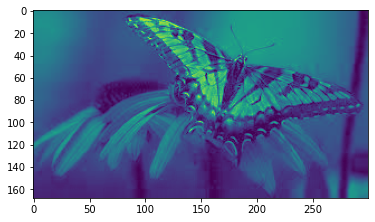

In [132]:
plt.imshow(blue) # Display the red channel in the image


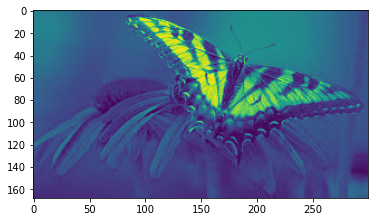

In [114]:
plt.imshow(green) # Display the red channel in the image


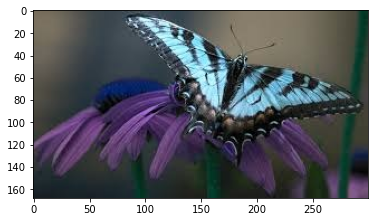

In [115]:
plt.imshow(img_gs) # Display the grayscale version of image

In [80]:
# Obtain the size of the original image
m, n = img.shape[0], img.shape[1]
m, n

(168, 300)

In [73]:
# Down sampling

# Assign a down sampling rate
# Here we are down sampling the
# image by 4
f = 4

# Create a matrix of all zeros for
# downsampled values
img2 = np.zeros((m//f, n//f), dtype=np.int)

# Assign the down sampled values from the original
# image according to the down sampling frequency.
# For example, if the down sampling rate f=2, take
# pixel values from alternate rows and columns
# and assign them in the matrix created above
for i in range(0, m, f):
	for j in range(0, n, f):
		try:

			img2[i//f][j//f] = img1[i][j]
		except IndexError:
			pass


# Show down sampled image
print('Down Sampled Image:')
plt.imshow(img2, cmap="gray")

ValueError: setting an array element with a sequence.

In [76]:
# Up sampling

# Create matrix of zeros to store the upsampled image
img3 = np.zeros((m, n), dtype=np.int)
# new size
for i in range(0, m-1, f):
	for j in range(0, n-1, f):
		img3[i, j] = img1[i//f][j//f]

# Nearest neighbour interpolation-Replication
# Replicating rows

for i in range(1, m-(f-1), f):
	for j in range(0, n-(f-1)):
		img3[i:i+(f-1), j] = img3[i-1, j]

# Replicating columns
for i in range(0, m-1):
	for j in range(1, n-1, f):
		img3[i, j:j+(f-1)] = img3[i, j-1]

# Plot the up sampled image
print('Up Sampled Image:')
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

ValueError: setting an array element with a sequence.

In [28]:
img[2][5][0]

119

In [9]:
#Get image height and width
height = img.shape[0]
width = img.shape[1]
height, width

(168, 300)

In [20]:
#Sample conversion into 16*16 area
numHeight = height//16
numwidth = width//16
numHeight, numwidth, type(numHeight)

(10, 18, int)

In [21]:
numHeight = np.array(numHeight)
numwidth = np.array(numwidth)

In [29]:
#Image loop sampling 16*16 area
new_img = []

for i in range(16):
    #Get Y coordinate
    y = i*numHeight
    for j in range(16):
        #Get X coordinate
        x = j*numwidth
        #Get the fill color pixels in the upper left corner
        b = img[y][x][0]
        g = img[y][x][1]
        r = img[y][x][2]
        
        #Cycle setting small area sampling
        for n in range(numHeight):
            for m in range(numwidth):
                new_img[y+n][x+m][0] = np.uint8(b)
                new_img[y+n][x+m][1] = np.uint8(g)
                new_img[y+n][x+m][2] = np.uint8(r)

IndexError: list index out of range

In [32]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#Read original image
img = cv2.imread('image1.jpg')

#Get image height and width
height = img.shape[0]
width = img.shape[1]

#Sample conversion into 8*8 area
numHeight = height/8
numwidth = width/8

#Create an image
new_img = np.zeros((height, width, 3), np.uint8)

#Image loop sampling 8*8 area
for i in range(8):
    #Get Y coordinate
    y = i*numHeight
    for j in range(8):
        #Get X coordinate
        x = j*numwidth
        #Get the fill color pixels in the upper left corner
        b = img[y] [x][0]
        g = img[y] [x][1]
        r = img[y] [x][2]
        
        #Cycle setting small area sampling
        for n in range(numHeight):
            for m in range(numwidth):
                new_img[y+n, x+m][0] = np.uint8(b)
                new_img[y+n, x+m][1] = np.uint8(g)
                new_img[y+n, x+m][2] = np.uint8(r)
        
#Display image
cv2.imshow("src", img)
cv2.imshow("Sampling", new_img)

#Waiting to show
cv2.waitKey(0)
cv2.destroyAllWindows()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [60]:
# Import cv2, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Read the original image and know its type
img1 = cv2.imread('image1.jpg')

# Obtain the size of the original image
[m, n] = img1.shape
print('Image Shape:', m, n)

# Show original image
print('Original Image:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ValueError: too many values to unpack (expected 2)

Image Shape: 168 300
Original Image:


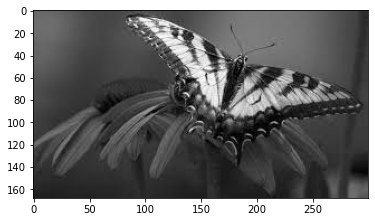

In [57]:
# Import cv2, matplotlib, numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Read the original image and know its type
img = cv2.imread('image1.jpg', 0)

# Obtain the size of the original image
[m, n] = img1.shape
print('Image Shape:', m, n)

# Show original image
print('Original Image:')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [52]:
# Down sampling

# Assign a down sampling rate
# Here we are down sampling the
# image by 4
f = 4

# Create a matrix of all zeros for
# downsampled values
img2 = np.zeros((m//f, n//f), dtype=np.int)

# Assign the down sampled values from the original
# image according to the down sampling frequency.
# For example, if the down sampling rate f=2, take
# pixel values from alternate rows and columns
# and assign them in the matrix created above
for i in range(0, m, f):
	for j in range(0, n, f):
		try:

			img2[i//f][j//f] = img1[i][j]
		except IndexError:
			pass


# Show down sampled image
print('Down Sampled Image:')
plt.imshow(img2, cmap="gray")

ValueError: setting an array element with a sequence.

Up Sampled Image:


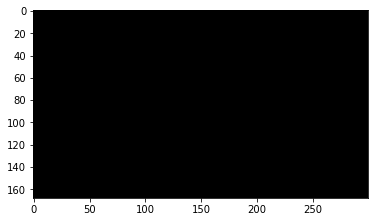

In [53]:
# Up sampling

# Create matrix of zeros to store the upsampled image
img3 = np.zeros((m, n), dtype=np.int)
# new size
for i in range(0, m-1, f):
	for j in range(0, n-1, f):
		img3[i, j] = img2[i//f][j//f]

# Nearest neighbour interpolation-Replication
# Replicating rows

for i in range(1, m-(f-1), f):
	for j in range(0, n-(f-1)):
		img3[i:i+(f-1), j] = img3[i-1, j]

# Replicating columns
for i in range(0, m-1):
	for j in range(1, n-1, f):
		img3[i, j:j+(f-1)] = img3[i, j-1]

# Plot the up sampled image
print('Up Sampled Image:')
plt.imshow(img3, cmap="gray")
